In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings("ignore")

# !pip3 install pyramid-arima


In [2]:
df = pd.read_csv(r"C:\Users\Sourabh\Downloads\truck sales time series\Truck_sales.csv")

In [3]:
df

,Month-Year,Number_Trucks_Sold
0,03-Jan,155
1,03-Feb,173
2,03-Mar,204
3,03-Apr,219
4,03-May,223
...,...,...
139,14-Aug,933
140,14-Sep,704
141,14-Oct,639
142,14-Nov,571


In [5]:
df.columns

Index(['Month-Year', 'Number_Trucks_Sold'], dtype='object')

<Axes: xlabel='Month-Year'>

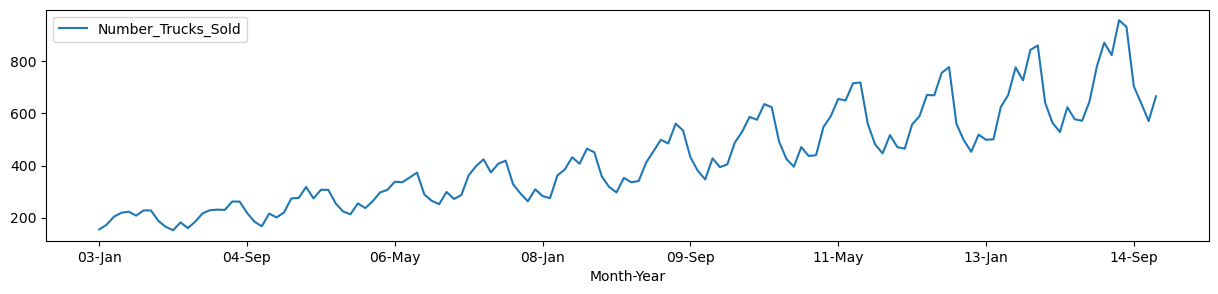

In [6]:
df.plot.line(x = 'Month-Year',y = 'Number_Trucks_Sold',figsize=(15,3))

In [7]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(df['Number_Trucks_Sold'])
dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','#lags used','number of observations used'])
dfoutput

Test Statistic                   1.115893
p-value                          0.995350
#lags used                      14.000000
number of observations used    129.000000
dtype: float64

In [8]:
df['diff_1'] = df['Number_Trucks_Sold'].diff()
df['diff_2'] = df['diff_1'].diff()

df

,Month-Year,Number_Trucks_Sold,diff_1,diff_2
0,03-Jan,155,NaN,NaN
1,03-Feb,173,18.0,NaN
2,03-Mar,204,31.0,13.0
3,03-Apr,219,15.0,-16.0
4,03-May,223,4.0,-11.0
...,...,...,...,...
139,14-Aug,933,-25.0,-159.0
140,14-Sep,704,-229.0,-204.0
141,14-Oct,639,-65.0,164.0
142,14-Nov,571,-68.0,-3.0


In [9]:
import numpy as np
np.var(df)  # d = 1

Number_Trucks_Sold    35335.322483
diff_1                 3892.818035
diff_2                 6520.741172
dtype: float64

In [10]:
from statsmodels.tsa.stattools import adfuller
print("Observations of Dickey-fuller test")
dftest = adfuller(df.diff_1.loc[1:,])
dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','#lags used','number of observations used'])
dfoutput

Observations of Dickey-fuller test


Test Statistic                  -2.541355
p-value                          0.105734
#lags used                      14.000000
number of observations used    128.000000
dtype: float64

In [11]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
smodel = pm.auto_arima(df.Number_Trucks_Sold,
                      start_p=0,max_p=3, # Pacf(p) = 0,1,2,3
                      d=0,max_d=2,       # Difference (d) = 0,1,2
                      start_q=0,max_q=3, # acf (q) = 0,1,2,3
                      m=12,              # frequency of series or time
                      seasonal=True,     # Seasonality is True then below P,D,Q will be used 
                      start_P=0,max_P=2, # P= 0,1,2
                      D=0,max_D=1,       # D = 0,1
                      start_Q=0,max_Q=2, # Q = 0,1,2
                      test='adf',       # use adftest to find optimal 'd'
                      trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=1920.714, Time=0.09 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=inf, Time=0.68 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=2181.492, Time=0.02 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=inf, Time=0.54 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.59 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=1604.548, Time=0.16 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=inf, Time=0.58 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=1307.420, Time=0.70 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=inf, Time=1.85 sec
 ARIMA(1,0,0)(1,0,2)[12] intercept   : AIC=1307.054, Time=1.51 sec
 ARIMA(1,0,0)(0,0,2)[12] intercept   : AIC=inf, Time=1.03 sec
 ARIMA(1,0,0)(2,0,2)[12] intercept   : AIC=inf, Time=2.04 sec
 ARIMA(0,0,0)(1,0,2)[12] intercept   : AIC=inf, Time=1.34 sec
 A

In [12]:
df

,Month-Year,Number_Trucks_Sold,diff_1,diff_2
0,03-Jan,155,NaN,NaN
1,03-Feb,173,18.0,NaN
2,03-Mar,204,31.0,13.0
3,03-Apr,219,15.0,-16.0
4,03-May,223,4.0,-11.0
...,...,...,...,...
139,14-Aug,933,-25.0,-159.0
140,14-Sep,704,-229.0,-204.0
141,14-Oct,639,-65.0,164.0
142,14-Nov,571,-68.0,-3.0


In [13]:
df['S_Forecast']=smodel.predict_in_sample()


In [14]:
df

,Month-Year,Number_Trucks_Sold,diff_1,diff_2,S_Forecast
0,03-Jan,155,NaN,NaN,0.000000
1,03-Feb,173,18.0,NaN,151.782418
2,03-Mar,204,31.0,13.0,164.152205
3,03-Apr,219,15.0,-16.0,187.624972
4,03-May,223,4.0,-11.0,204.790024
...,...,...,...,...,...
139,14-Aug,933,-25.0,-159.0,964.537555
140,14-Sep,704,-229.0,-204.0,714.214463
141,14-Oct,639,-65.0,164.0,623.737968
142,14-Nov,571,-68.0,-3.0,592.913556


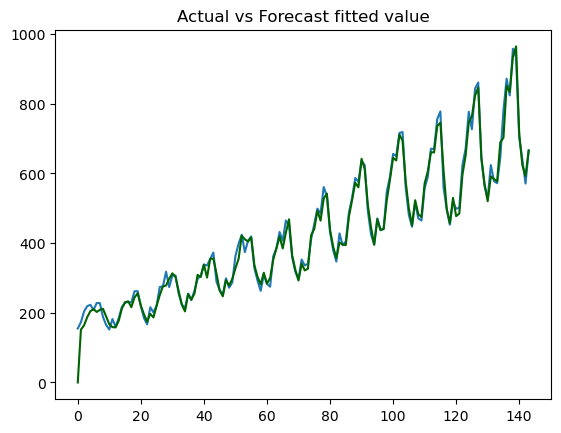

In [16]:
# Plot
plt.plot(df.Number_Trucks_Sold)
plt.plot(df.S_Forecast, color='darkgreen')
plt.title("Actual vs Forecast fitted value")
plt.show()

In [17]:
def forecast_accuracy(actual,forecast):
    mape = (np.mean(np.abs(actual-forecast)/np.abs(actual)))*100 
    return({'mape':mape})

forecast_accuracy(df.Number_Trucks_Sold,df.S_Forecast)

{'mape': 4.435999531668972}

In [18]:
n_periods=10
future_Forecast = smodel.predict(n_periods=n_periods)
future_Forecast

144    620.249095
145    612.643855
146    698.228731
147    810.796524
148    908.181006
149    859.168299
150    991.206357
151    977.166028
152    737.456617
153    666.733128
dtype: float64